In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


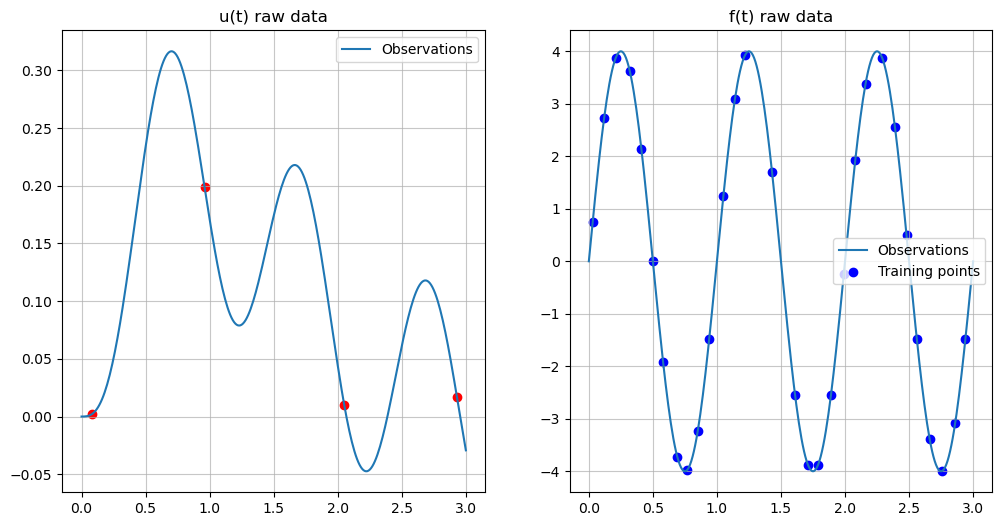

In [14]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
training_points_u = 4
training_points_f = 30
model.set_training_data("damped_m1k2b2.csv",training_points_u,[1e-8,1e-8],seeds_training,training_points_f)

model.set_validation_data(500)
model.jitter = 1e-6
x_end = 3
x_start = 0
y_start = 0
#y_end = model.raw_data[1][-1]
#u_train = np.array([y_start,y_end]).reshape(-1,1)
#model.u_train = u_train
#print(y_end)
#model.X_u = np.array([[x_start],[x_end]])
#model.targets = np.concatenate([u_train, model.f_train])
model.plot_raw_data(Training_points=True)

In [ ]:
model.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 1000, -1

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-4, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      


In [15]:
model.set_params(np.array([0.30482647, 0.09262207, 0.97422551, 1.93016524, 1.92097365])) # -20.77775 4 / 30
#100%|██████████| 3000/3000 [02:28<00:00, 20.25it/s]
#  message: Converged (|f_n-f_(n-1)| ~= 0)
#  success: True
#   status: 1
#      fun: -20.154983520507812
#        x: [ 2.791e-01  1.053e-01  9.128e-01  1.439e+00  1.598e+00]
#      nit: 7
#      jac: [-2.390e+02 -7.326e+01  1.245e+02  1.992e+01 -5.785e+01]
#     nfev: 46

 82%|████████▏ | 816/1000 [00:54<00:06, 28.19it/s]

UnboundLocalError: cannot access local variable 'X_u_star' where it is not associated with a value

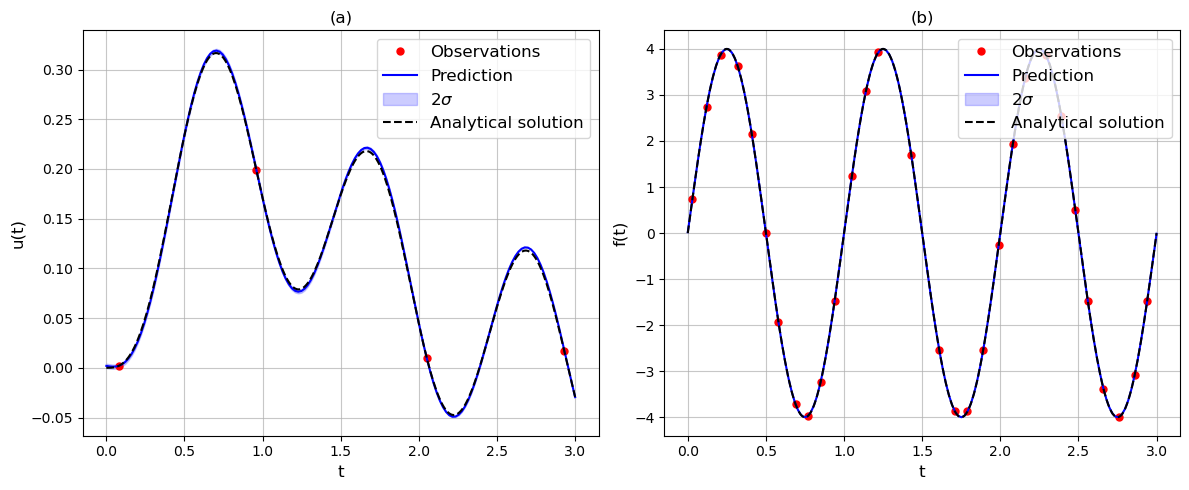

In [17]:
X_star = np.linspace(0,3,150).reshape(-1,1)

model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction_different_n")
model.error()
model.rel_l2_error



 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\leitg\anaconda3\Lib\site-packages\scipy\stats\_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


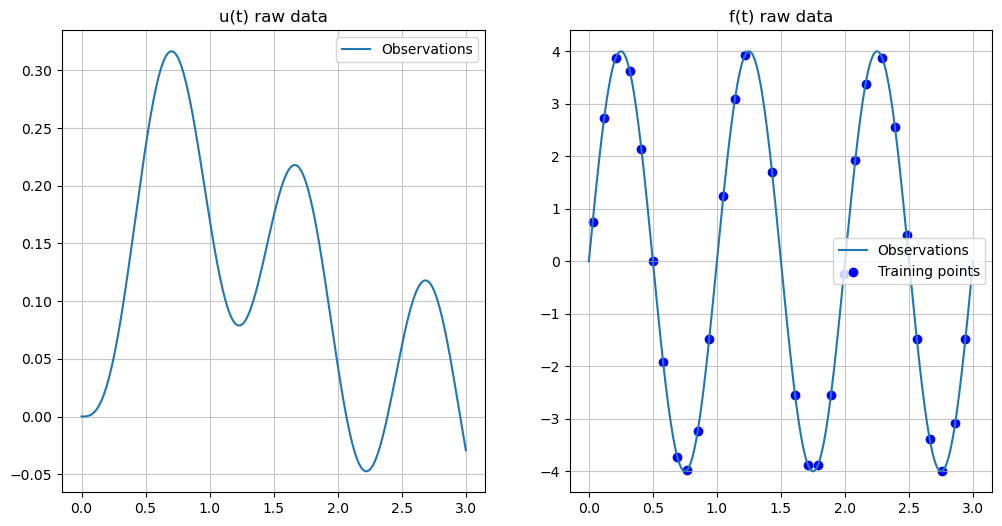

In [80]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
training_points_u = 0
training_points_f = 30
model.set_training_data("damped_m1k2b2.csv",training_points_u,[1e-8,1e-8],seeds_training,training_points_f)

model.set_validation_data(500)
model.jitter = 1e-6
x_end = 3
x_start = 0
y_start = 0
#y_end = model.raw_data[1][-1]
#u_train = np.array([y_start,y_end]).reshape(-1,1)
#model.u_train = u_train
#print(y_end)
#model.X_u = np.array([[x_start],[x_end]])
#model.targets = np.concatenate([u_train, model.f_train])
model.plot_raw_data(Training_points=True)


In [81]:
model.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 2000, -1

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-4, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      


100%|██████████| 2000/2000 [01:28<00:00, 22.52it/s]


 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: -34.357505798339844
       x: [ 4.314e-01  1.669e-01  9.790e-01  4.061e-01  1.390e+00]
     nit: 2
     jac: [ 1.174e+02 -1.819e+02 -2.771e+01 -3.515e-01  9.166e-01]
    nfev: 53


 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:612: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\leitg\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:613: RuntimeWarning:invalid value encountered in sqrt


{'u': 1.0138390599386766, 'f': 6.864442788624384e-05}

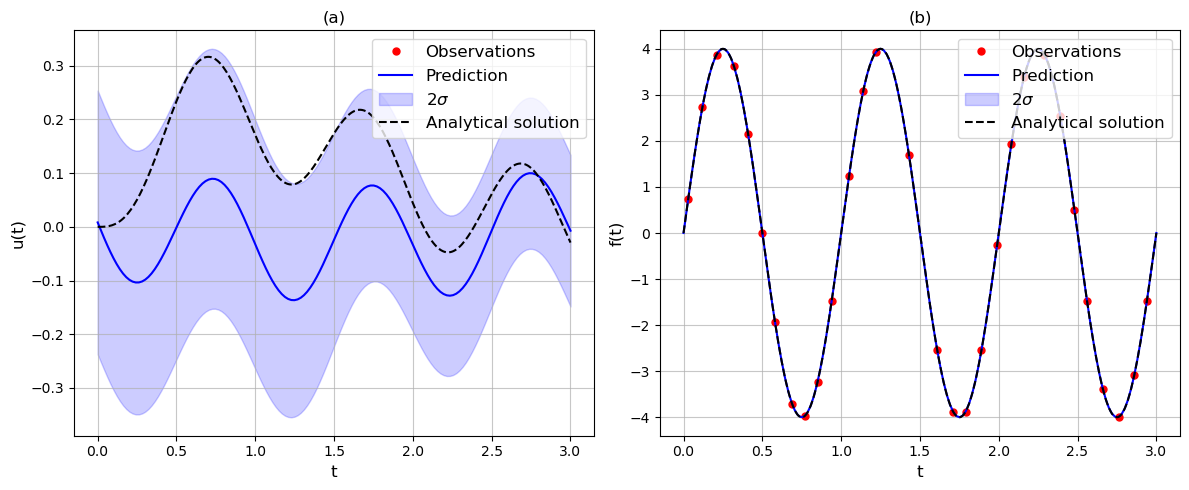

In [82]:
X_star = np.linspace(0,3,150).reshape(-1,1)

model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction_different_n=.png")
model.error() 
model.rel_l2_error
